In [1]:
#%load_ext cudf.pandas

#!pip install --upgrade numpy
#!pip install --upgrade pandas
#!pip install seaborn
#!pip install joblib
#!pip install -U scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
import joblib

from datetime import datetime
from datetime import timedelta

pd.set_option('use_inf_as_na', True)
pd.set_option('display.max_columns', None)
warnings.simplefilter("ignore", UserWarning)

#np.seterr('raise')
#np.seterr(divide = 'ignore') 
import matplotlib.pyplot as plt

from sklearn import preprocessing

C:\Users\letic\AppData\Local\Temp\ipykernel_26532\1825759106.py:21: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('use_inf_as_na', True)


In [16]:
path = "data_win\\"

#timeframe = ""
versao='data11'
filename = "WIN_DATASET_normas_"+versao+".csv"
df = pd.read_csv(path+filename, sep=';',encoding='utf-8')

df.columns = ['id','datetime','decisao','ampmedia','tp','sl','stdDev_buffer_0','stdDev_buffer_1','iTrades','dDifPrecoCum','dDifVolCum','dDifVolCum_div_iTrades','dVol','iATR_buffer_0','dDifLastAsk1','dDifLastBid1','dBid','dAsk','dMedDifVolCum','dAvgDifVolCum','dStdDifVolCum','dMaxDifVolCum','dMinDifVolCum','dAmpDifVolCum','dAssDifVolCum','dCurDifVolCum','dMedDifPrecoCum','dAvgDifPrecoCum','dStdDifPrecoCum','dMaxDifPrecoCum','dMinDifPrecoCum','dAmpDifPrecoCum','dAssDifPrecoCum','dCurDifPrecoCum','dMedTrades','dAvgTrades','dStdTrades','dMaxTrades','dMinTrades','dAmpTrades','dAssTrades','dCurTrades','dMedOfMedDifVolCum','dMedOfCurDifVolCum','dMedOfAssDifVolCum','dMedOfMedDifPrecoCum','dMedOfCurDifPrecoCum','dMedOfAssDifPrecoCum','dMedOfMedTrades','dMedOfCurTrades','dMedOfAssTrades','tat_iQtdeBuy','tat_iQtdeSell','tat_iQtdeBalance','tat_dSumBalance','tat_dCurtoseQC','tat_dCurtoseQV','tat_dPMedPondC','tat_dPMedPondV','dMedTaTQtdeBuy','dMedTaTQtdeSell','dMedTaTQtdeBalance','dMedTaTSumBalance','dMedTaTCurtoseQC','dMedTaTCurtoseQV','dMedTaTAssimetriaQC','dMedTaTAssimetriaQV','dMedTaTPMedPondC','dMedTaTPMedPondV','dAvgTaTQtdeBuy','dAvgTaTQtdeSell','dAvgTaTQtdeBalance','dAvgTaTSumBalance','dAvgTaTCurtoseQC','dAvgTaTCurtoseQV','dAvgTaTAssimetriaQC','dAvgTaTAssimetriaQV','dAvgTaTPMedPondC','dAvgTaTPMedPondV','dCurTaTQtdeBuy','dCurTaTQtdeSell','dCurTaTQtdeBalance','dCurTaTSumBalance','dCurTaTCurtoseQC','dCurTaTCurtoseQV','dCurTaTAssimetriaQC','dCurTaTAssimetriaQV','dCurTaTPMedPondC','dCurTaTPMedPondV','open','high','low','close','tick_volume','real_volume','dt','hour','minute','second','ratioPMedPondC','ratioPMedPondV','ampco','difPMP','difMedPMP','difCurQCQV','difAvgTaTCur','difAvgTaTAss','difAvgTaTPMP','difCurTaTCur','difCurTatAss','difCurTatPMP','ratioCurTaTQtdeSell','ratioCurTaTQtdeBuy','tat_iQtdeBalanceAcum','tat_dSumBalanceAcum','ratio_iQtdeSumAcum','norma_L1','norma_L2','norma_p','norma_L_inf']

#Transform the object to timestamp
df['datetime'] = df['datetime'].apply(lambda x: pd.Timestamp(x))
df['dt'] = df['datetime'] 
df = df.set_index('datetime')

#Eliminando os duplicados
df.drop_duplicates(subset=None, keep='first', inplace=True)

df.sort_index(inplace=True)

df.fillna(0, inplace=True)

In [17]:
df['close_median_10'] = df['close'].rolling(min_periods=1, window=10).median()
df['close_median_5'] = df['close'].rolling(min_periods=1, window=5).median()
df.head()

,id,decisao,ampmedia,tp,sl,stdDev_buffer_0,stdDev_buffer_1,iTrades,dDifPrecoCum,dDifVolCum,dDifVolCum_div_iTrades,dVol,iATR_buffer_0,dDifLastAsk1,dDifLastBid1,dBid,dAsk,dMedDifVolCum,dAvgDifVolCum,dStdDifVolCum,dMaxDifVolCum,dMinDifVolCum,dAmpDifVolCum,dAssDifVolCum,dCurDifVolCum,dMedDifPrecoCum,dAvgDifPrecoCum,dStdDifPrecoCum,dMaxDifPrecoCum,dMinDifPrecoCum,dAmpDifPrecoCum,dAssDifPrecoCum,dCurDifPrecoCum,dMedTrades,dAvgTrades,dStdTrades,dMaxTrades,dMinTrades,dAmpTrades,dAssTrades,dCurTrades,dMedOfMedDifVolCum,dMedOfCurDifVolCum,dMedOfAssDifVolCum,dMedOfMedDifPrecoCum,dMedOfCurDifPrecoCum,dMedOfAssDifPrecoCum,dMedOfMedTrades,dMedOfCurTrades,dMedOfAssTrades,tat_iQtdeBuy,tat_iQtdeSell,tat_iQtdeBalance,tat_dSumBalance,tat_dCurtoseQC,tat_dCurtoseQV,tat_dPMedPondC,tat_dPMedPondV,dMedTaTQtdeBuy,dMedTaTQtdeSell,dMedTaTQtdeBalance,dMedTaTSumBalance,dMedTaTCurtoseQC,dMedTaTCurtoseQV,dMedTaTAssimetriaQC,dMedTaTAssimetriaQV,dMedTaTPMedPondC,dMedTaTPMedPondV,dAvgTaTQtdeBuy,dAvgTaTQtdeSell,dAvgTaTQtdeBalance,dAvgTaTSumBalance,dAvgTaTCurtoseQC,dAvgTaTCurtoseQV,dAvgTaTAssimetriaQC,dAvgTaTAssimetriaQV,dAvgTaTPMedPondC,dAvgTaTPMedPondV,dCurTaTQtdeBuy,dCurTaTQtdeSell,dCurTaTQtdeBalance,dCurTaTSumBalance,dCurTaTCurtoseQC,dCurTaTCurtoseQV,dCurTaTAssimetriaQC,dCurTaTAssimetriaQV,dCurTaTPMedPondC,dCurTaTPMedPondV,open,high,low,close,tick_volume,real_volume,dt,hour,minute,second,ratioPMedPondC,ratioPMedPondV,ampco,difPMP,difMedPMP,difCurQCQV,difAvgTaTCur,difAvgTaTAss,difAvgTaTPMP,difCurTaTCur,difCurTatAss,difCurTatPMP,ratioCurTaTQtdeSell,ratioCurTaTQtdeBuy,tat_iQtdeBalanceAcum,tat_dSumBalanceAcum,ratio_iQtdeSumAcum,norma_L1,norma_L2,norma_p,norma_L_inf,close_median_10,close_median_5
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-09-18 09:03:02,0,0,104.8,20.0,20.0,74.258846,85.882752,305,15.0,1941.0,6.363934,1948.0,135.0,0.0,5.0,119920.0,119925.0,703.0,1077.266667,972.284545,3813.0,4.0,3809.0,1.555681,1.489214,0.0,0.166667,14.412838,30.0,-40.0,70.0,-0.123996,0.788607,133.5,171.100000,106.288595,531.0,1.0,530.0,1.487508,2.402306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,568,262,306,872.0,19.962490,36.282976,119921.257996,119913.906542,144.0,152.5,-36.5,-87.5,18.796443,15.800422,4.026555,3.419496,119939.148478,119934.319775,211.400000,232.833333,-21.433333,-91.233333,29.529116,32.229801,4.399435,4.435122,119939.259872,119934.302228,10.219552,1.312894,2.369943,2.423861,1.813974,2.604386,0.151294,1.330071,-0.888282,-0.819711,119915.0,119930.0,119905.0,119925.0,832,1948,2023-09-18 09:03:02,9,3,2,1.083653,0.922805,10.0,7.351454,4.828703,-16.320486,-2.700685,-0.035687,4.957644,-0.790412,-1.178777,-0.068571,0.128469,7.783989,306.0,872.0,2.849673,1072.290663,881.375728,872.630432,872.0,119925.0,119925.0
2023-09-18 09:03:04,1,0,104.8,20.0,20.0,74.258846,85.882752,89,0.0,300.0,3.370787,2248.0,135.0,0.0,5.0,119920.0,119925.0,703.0,1068.533333,978.230906,3813.0,4.0,3809.0,1.541525,1.446358,0.0,0.166667,14.412838,30.0,-40.0,70.0,-0.123996,0.788607,133.5,169.666667,107.120729,531.0,1.0,530.0,1.478531,2.325394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88,63,25,58.0,13.009342,38.063531,119922.724719,119917.666667,144.0,149.5,-32.0,-84.0,18.796443,15.800422,4.026555,3.419496,119939.148478,119934.319775,211.666667,229.233333,-17.566667,-81.933333,29.739228,31.725045,4.423001,4.415492,119939.239912,119934.276454,10.245481,1.264456,2.350904,2.422823,1.845996,2.819196,0.194360,1.481864,-0.893360,-0.825935,119915.0,119930.0,119905.0,119925.0,985,2248,2023-09-18 09:03:04,9,3,4,1.081634,0.924527,10.0,5.058052,4.828703,-25.054188,-1.985817,0.007510,4.963458,-0.973201,-1.287505,-0.067425,0.123416,8.102677,331.0,930.0,2.809668,1113.623996,937.538092,930.442287,930.0,119925.0,119925.0
2023-09-18 09:03:06,2,0,104.8,20.0,20.0,73.641121,85.882752,125,-25.0,825.0,6.600000,3073.0,136.0,-5.0,0.0,119900.0,119905.0,703.0,1067.766667,978.418699,3813.0,4.0,3809.0,1.542777,1.447819,0.0,-0.833333,15.090722,30.0,-40.

In [5]:
filename = "win_dataset_data11.csv"
dataset = pd.read_csv(path+filename, sep=';',encoding='utf-8')

del dataset['Unnamed: 0']
del dataset['variable']

#Transform the object to timestamp
dataset['datetime'] = dataset['dt'].apply(lambda x: pd.Timestamp(x))
dataset = dataset.set_index('datetime')

In [30]:
dataset.head()

,dt,year,month,day,hour,minute,second,TP,SL,amp,ampTH,ampTL,pFreq,pPercentil,pTargetSumBalanceAcumBuy,pTargetSumBalanceAcumSell,pRatio,pRatioSum,spread_latency,bManagingModel,ampmedia,stdDev_buffer_0,stdDev_buffer_1,dDifVolCum,dVol,iATR_buffer_0,dStdDifVolCum,dMedDifVolCum,iTrades,dAvgTrades,tat_dSumBalanceAcum,tat_iQtdeBalanceAcum,ratio_iQtdeSumAcum,dAvgTaTSumBalance,dMedTaTSumBalance,dMedDifPrecoCum,dAssDifPrecoCum,dAvgTaTQtdeBalance,dMedOfCurDifPrecoCum,op,precoTrade,precoMedian10,precoMedian5,bStop,rv1,rv2,tat_dSumBalanceAcum_goal,tat_iQtdeBalanceAcum_goal,ratio_iQtdeSumAcum_goal,dAvgTaTSumBalance_goal,dMedTaTSumBalance_goal,dMedDifPrecoCum_goal,dAssDifPrecoCum_goal,dAvgTaTQtdeBalance_goal,dMedOfCurDifPrecoCum_goal,dtclose,difTime,precoClose,contracts,result,liq_reais,obs,target
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-09-18 09:37:06,2023-09-18 09:37:06,2023,9,18,9,37,6,50,60,50,10.0,25.0,0.8,80,6108.0,-6200.0,10,2,0,False,35.2,16.827920,10.192250,13062.0,17311.0,42.0,2374.463957,414.0,1197,133.300000,10860.0,2933.0,3.702693,567.933333,67.0,2.5,-0.147624,153.866667,-0.631570,vd,120185.0,120165.0,120170.0,False,0,0,-6600.0,-2581.0,2.557148,-441.766667,-172.0,-5.0,0.098325,-147.666667,-0.640758,2023-09-18 10:01:08,1442,120135.0,2,100,20.0,win,-1
2023-09-18 10:14:46,2023-09-18 10:14:46,2023,9,18,10,14,46,60,90,175,5.0,90.0,0.8,80,6108.0,-6200.0,10,2,0,False,69.2,33.034909,31.977926,9165.0,35202.0,90.0,1756.056195,852.0,1174,194.933333,10857.0,3603.0,3.013322,545.266667,79.5,5.0,0.485261,189.266667,-0.907055,vd,120115.0,120052.5,120065.0,False,0,0,4622.0,1526.0,3.028834,403.933333,227.0,0.0,0.069694,132.866667,-1.203419,2023-09-18 10:16:32,106,120205.0,2,-180,-36.0,loss,1
2023-09-18 10:16:42,2023-09-18 10:16:42,2023,9,18,10,16,42,60,90,225,5.0,80.0,0.8,80,6108.0,-6200.0,10,2,0,False,69.2,76.418907,64.389470,5350.0,51268.0,85.0,1998.371528,1594.0,653,299.766667,6702.0,2061.0,3.251820,887.833333,421.0,2.5,0.150161,260.533333,-1.203419,vd,120235.0,120200.0,120220.0,False,0,0,5775.0,1801.0,3.206552,295.266667,14.5,2.5,-0.339036,84.966667,0.638067,2023-09-18 10:19:16,154,120325.0,2,-180,-36.0,loss,1
2023-09-19 09:35:50,2023-09-19 09:35:50,2023,9,19,9,35,50,60,90,175,70.0,0.0,0.8,80,6108.0,-6200.0,10,2,0,False,60.8,45.813583,51.356767,3558.0,50850.0,75.0,1586.428726,1339.5,507,279.366667,-7000.0,-2099.0,3.334921,-640.500000,-275.0,-5.0,0.818719,-207.400000,0.647019,cp,119380.0,119407.5,119395.0,False,0,0,6338.0,1938.0,3.270382,-181.333333,-132.0,0.0,1.558216,-44.166667,0.661355,2023-09-19 09:36:14,24,119440.0,2,120,24.0,win,1
2023-09-19 09:53:46,2023-09-19 09:53:46,2023,9,19,9,53,46,60,90,90,10.0,80.0,0.8,80,6108.0,-6200.0,10,2,0,False,34.0,25.562229,15.353617,5963.0,39536.0,53.0,1765.118750,826.0,874,205.733333,7148.0,2472.0,2.891586,736.233333,268.0,0.0,-0.113547,233.500000,-0.677472,vd,119520.0,119487.5,119510.0,False,0,0,-3103.0,-1223.0,2.537204,559.566667,476.5,0.0,-0.795481,178.966667,-0.458825,2023-09-19 09:54:10,24,119460.0,2,120,24.0,win,-1


In [6]:
#Ganhos medios por dia (pontos)
print('Media/Dia (pontos):',dataset.groupby(['day']).sum()['result'].mean())
#Resultado diario
dataset.groupby(['month','day']).sum()['result']

Media/Dia (pontos): 347.037037037037


month  day
9      18     -260
       19     1020
       20     1260
       21      720
       22      280
       25      840
       26     1660
       27     -360
       28     -360
       29     -420
10     2      1620
       3      -300
       4       960
       5       720
       6      -300
       9      1080
       10      290
       11     1260
       13     -360
       16     -300
       17     -280
       19     -300
       20     -360
       23      660
       24      670
       25      470
       26     -300
       27     -360
       30     -360
       31        0
11     1      -360
       3       280
       6       860
       7      -300
Name: result, dtype: int64

In [7]:
#Qtdade de trades medios
print('Media/Dia (Trades):',dataset.groupby(['day']).count()['result'].mean())
#Trades por dia
dataset.groupby(['month','day']).count()['result']

Media/Dia (Trades): 17.25925925925926


month  day
9      18      3
       19     16
       20     23
       21     26
       22     17
       25     17
       26     21
       27      7
       28      2
       29      4
10     2      26
       3      15
       4      33
       5      26
       6      10
       9      19
       10     17
       11     18
       13      2
       16      5
       17     15
       19      5
       20      2
       23     23
       24     23
       25     26
       26      5
       27      2
       30      2
       31      5
11     1       2
       3      22
       6      17
       7      10
Name: result, dtype: int64

In [8]:
#Ganhos medios por dia, liquidos (reais)
print('Media/Dia (reais):', dataset.groupby(['day']).sum()['liq_reais'].mean())
print('Soma Total:', dataset.groupby(['day']).sum()['liq_reais'].sum())
#Resultado diario
dataset.groupby(['month', 'day']).sum()['liq_reais']

Media/Dia (reais): 69.4074074074074
Soma Total: 1874.0


month  day
9      18     -52.0
       19     204.0
       20     252.0
       21     144.0
       22      56.0
       25     168.0
       26     332.0
       27     -72.0
       28     -72.0
       29     -84.0
10     2      324.0
       3      -60.0
       4      192.0
       5      144.0
       6      -60.0
       9      216.0
       10      58.0
       11     252.0
       13     -72.0
       16     -60.0
       17     -56.0
       19     -60.0
       20     -72.0
       23     132.0
       24     134.0
       25      94.0
       26     -60.0
       27     -72.0
       30     -72.0
       31       0.0
11     1      -72.0
       3       56.0
       6      172.0
       7      -60.0
Name: liq_reais, dtype: float64

<AxesSubplot: xlabel='datetime'>

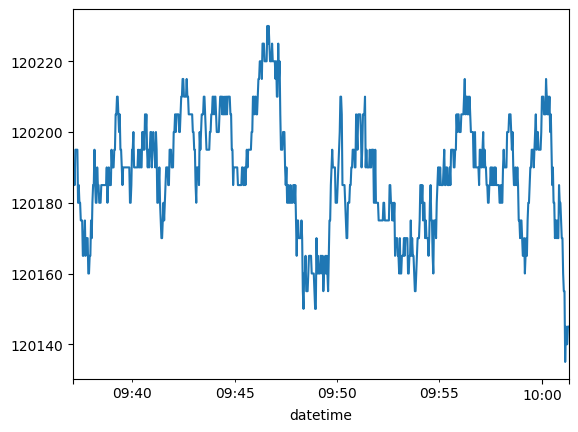

In [9]:
#2023-09-21 17:04:00 inverte
p1 = '2023-09-18 09:37:06'
p2 = '2023-09-18 10:01:18'

rule1 = "dt >= '" + p1 + "' and dt <= '" + p2 + "' "
d = df.query(rule1)
d['close'].plot()